<a href="https://colab.research.google.com/github/trybol/matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score


%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train  = train['features'], train['labels']
X_test, y_test  = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [6]:
model = Sequential([
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    
    Flatten(),
    
    Dense(num_classes, activation='softmax'),
])

#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 4s 3ms/step - loss: 10.9531 - accuracy: 0.7757


In [0]:
def get_cnn_v1(input_shape, num_classes):
 return Sequential([
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    
    Flatten(),
    
    Dense(num_classes, activation='softmax'),
 ])

def train_model(model, X_train, y_train, params_fit={}):
  
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  
  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
  )

  return model

In [8]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 31.7801 - accuracy: 0.6852 - val_loss: 0.2742 - val_accuracy: 0.9404
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2330 - accuracy: 0.9485 - val_loss: 0.1425 - val_accuracy: 0.9695
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1425 - accuracy: 0.9688 - val_loss: 0.1182 - val_accuracy: 0.9741
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1240 - accuracy: 0.9716 - val_loss: 0.0757 - val_accuracy: 0.9826
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.0932 - accuracy: 0.9795 - val_loss: 0.0594 - val_accuracy: 0.9874


In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [22]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[1.33253183e-11, 3.28227316e-06, 4.50250140e-04, ...,
        1.60475872e-06, 4.76948771e-04, 1.00791063e-02],
       [2.49755213e-13, 3.46884844e-05, 1.07772218e-03, ...,
        1.75673777e-04, 1.05458912e-06, 2.14401586e-03],
       [3.81221357e-12, 9.91897309e-07, 2.51144193e-05, ...,
        2.49022173e-06, 2.29540630e-03, 4.66564763e-03],
       ...,
       [5.89723326e-03, 1.60646997e-02, 1.33263674e-02, ...,
        4.32451069e-03, 1.12298466e-02, 9.20986012e-03],
       [2.89306021e-03, 4.60851798e-03, 7.50652468e-03, ...,
        1.29161645e-02, 2.17518527e-02, 5.12198918e-03],
       [4.11182788e-04, 5.85408974e-03, 3.37796332e-03, ...,
        2.86555383e-03, 2.86825118e-03, 1.40839751e-04]], dtype=float32)

In [23]:
y_pred_prob[400]

array([1.81193580e-04, 7.01319277e-06, 5.34817433e-11, 3.75315832e-17,
       9.99810517e-01, 1.27172677e-06, 2.48939654e-18, 6.48803611e-19,
       2.51892016e-28, 1.11257725e-15, 6.98586494e-19, 4.79005051e-15,
       2.54154134e-23, 1.67232615e-21, 2.22178868e-26, 2.86129356e-24,
       5.03465426e-24, 3.83303272e-29, 3.11190071e-12, 9.70740914e-30,
       8.73891907e-23, 4.27178454e-22, 6.35344991e-27, 1.43465682e-21,
       9.99538790e-14, 1.06261321e-15, 5.04250364e-10, 1.00240245e-17,
       3.41501168e-23, 1.37280112e-16, 2.88836811e-25, 4.13668723e-17,
       4.37518391e-17, 1.31954684e-29, 3.30476328e-27, 9.75737012e-32,
       6.72446204e-29, 4.19999037e-16, 3.04491555e-30, 5.86874187e-28,
       2.36685118e-18, 2.16088473e-28, 1.61781369e-24], dtype=float32)

In [24]:
np.argmax( y_pred_prob[400] )

4

<BarContainer object of 43 artists>

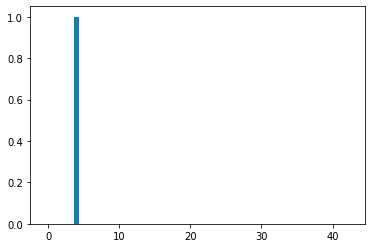

In [25]:
plt.bar(range(43), y_pred_prob[400])

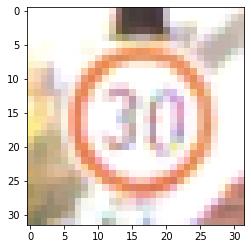

In [14]:
plt.imshow(X_test[400])

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax( y_test, axis=1 )

  y_pred_prob = model_trained.predict( X_test )
  y_pred = np.argmax( y_pred_prob, axis=1 )

  return scoring(y_test_norm, y_pred)

In [29]:
predict(model_trained, X_test, y_test)

0.818140589569161

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [33]:
def get_cnn_v2(input_shape, num_classes):
 return Sequential([
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])

train_and_predict( get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 6.0871 - accuracy: 0.2210 - val_loss: 1.9853 - val_accuracy: 0.4526
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 1.6655 - accuracy: 0.5134 - val_loss: 0.7331 - val_accuracy: 0.8012
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.8872 - accuracy: 0.7299 - val_loss: 0.3351 - val_accuracy: 0.9055
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5745 - accuracy: 0.8247 - val_loss: 0.1882 - val_accuracy: 0.9586
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.4040 - accuracy: 0.8784 - val_loss: 0.0990 - val_accuracy: 0.9779


0.8873015873015873

In [34]:
def get_cnn_v3(input_shape, num_classes):
 return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])

train_and_predict( get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.1536 - accuracy: 0.4848 - val_loss: 0.4869 - val_accuracy: 0.9034
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4892 - accuracy: 0.8518 - val_loss: 0.1339 - val_accuracy: 0.9696
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2722 - accuracy: 0.9200 - val_loss: 0.0510 - val_accuracy: 0.9883
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1690 - accuracy: 0.9505 - val_loss: 0.0313 - val_accuracy: 0.9926
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1319 - accuracy: 0.9612 - val_loss: 0.0234 - val_accuracy: 0.9939


0.9612244897959183

In [36]:
def get_cnn_v4(input_shape, num_classes):
 return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])

train_and_predict( get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.8095 - accuracy: 0.2659 - val_loss: 1.0425 - val_accuracy: 0.6982
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.9757 - accuracy: 0.7080 - val_loss: 0.3180 - val_accuracy: 0.9130
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.4942 - accuracy: 0.8508 - val_loss: 0.1163 - val_accuracy: 0.9680
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3216 - accuracy: 0.9030 - val_loss: 0.0723 - val_accuracy: 0.9805
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2361 - accuracy: 0.9285 - val_loss: 0.0491 - val_accuracy: 0.9880


0.9684807256235828

In [37]:
def get_cnn_v5(input_shape, num_classes):
 return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])

train_and_predict( get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.5882 - accuracy: 0.2882 - val_loss: 0.8947 - val_accuracy: 0.7271
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.8816 - accuracy: 0.7178 - val_loss: 0.2586 - val_accuracy: 0.9186
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4574 - accuracy: 0.8543 - val_loss: 0.1221 - val_accuracy: 0.9647
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.3115 - accuracy: 0.9012 - val_loss: 0.0774 - val_accuracy: 0.9754
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2378 - accuracy: 0.9278 - val_loss: 0.0685 - val_accuracy: 0.9811


0.9489795918367347

In [39]:
X_train[0].shape

(32, 32, 3)

In [61]:
color.rgb2gray(X_train[0]).shape

(32, 32)

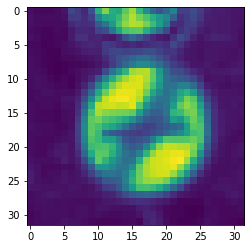

In [62]:
plt.imshow(color.rgb2gray(X_train[0]))

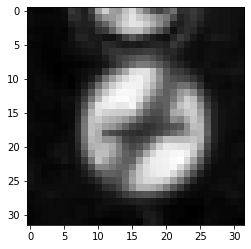

In [63]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [71]:
X_train_gray

array([[[[0.10025647],
         [0.0963349 ],
         [0.09605216],
         ...,
         [0.11200627],
         [0.1086502 ],
         [0.10893294]],

        [[0.10417804],
         [0.09914039],
         [0.09914039],
         ...,
         [0.11200627],
         [0.10836745],
         [0.10781686]],

        [[0.10362745],
         [0.09914039],
         [0.09830706],
         ...,
         [0.11200627],
         [0.10836745],
         [0.10781686]],

        ...,

        [[0.0963349 ],
         [0.10025647],
         [0.10192314],
         ...,
         [0.0963349 ],
         [0.09688549],
         [0.10052431]],

        [[0.09436275],
         [0.09828431],
         [0.10275647],
         ...,
         [0.0963349 ],
         [0.09688549],
         [0.09660275]],

        [[0.09519608],
         [0.09911765],
         [0.10050157],
         ...,
         [0.09605216],
         [0.09296392],
         [0.08904235]]],


       [[[0.09745098],
         [0.09269608],
         [0.09

In [72]:
model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model,X_train_gray,y_train,params_fit={})
predict(model_trained,X_test_gray,y_test)

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.6086 - accuracy: 0.2688 - val_loss: 0.6371 - val_accuracy: 0.8061
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.5475 - accuracy: 0.8266 - val_loss: 0.1259 - val_accuracy: 0.9660
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2536 - accuracy: 0.9198 - val_loss: 0.0704 - val_accuracy: 0.9794
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1788 - accuracy: 0.9449 - val_loss: 0.0340 - val_accuracy: 0.9904
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1312 - accuracy: 0.9574 - val_loss: 0.0251 - val_accuracy: 0.9933


0.9698412698412698

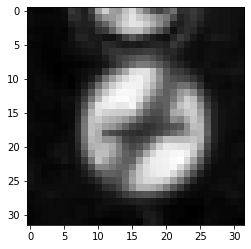

In [74]:
plt.imshow(color.rgb2gray(X_train[0]),cmap=plt.get_cmap('gray'))